#LAB_3 : Build a FFN Network to solve a Multi- class classification problem
(A)


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
df = pd.DataFrame(data=iris.data , columns=iris.feature_names)


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = iris.target
y=pd.DataFrame(y,columns=['Target'])


In [ ]:
df=pd.concat([df,y],axis=1)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df = shuffle(df)
X = df.drop(['Target'], axis = 1)
X = np.array(X)
Y = np.array(df['Target'])
X[:10], Y[:10]

(array([[6.6, 3. , 4.4, 1.4],
        [4.6, 3.2, 1.4, 0.2],
        [5.5, 2.6, 4.4, 1.2],
        [6.9, 3.1, 4.9, 1.5],
        [5.4, 3.7, 1.5, 0.2],
        [6.9, 3.1, 5.4, 2.1],
        [6.3, 2.9, 5.6, 1.8],
        [5.7, 2.8, 4.5, 1.3],
        [5.7, 2.5, 5. , 2. ],
        [6.1, 3. , 4.9, 1.8]]),
 array([1, 0, 1, 1, 0, 2, 2, 1, 2, 2]))

In [ ]:
l_encode = LabelEncoder()
l_encode.fit(Y)
Y = l_encode.transform(Y)
Y = to_categorical(Y)


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.3, random_state = 0)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((105, 4), (105, 3), (45, 4), (45, 3))

In [ ]:
dd = len(df.columns)-1
dd

4

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim = dd, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(train_x, train_y,validation_data=(test_x,test_y), epochs = 30, batch_size = 5)
scores = model.evaluate(test_x, test_y)

Epoch 1/30
21/21 [==============================] - 2s 12ms/step - loss: 1.5675 - accuracy: 0.4571 - val_loss: 1.3169 - val_accuracy: 0.6667
Epoch 2/30
21/21 [==============================] - 0s 4ms/step - loss: 1.2095 - accuracy: 0.6667 - val_loss: 1.0629 - val_accuracy: 0.6667
Epoch 3/30
21/21 [==============================] - 0s 4ms/step - loss: 0.9909 - accuracy: 0.6667 - val_loss: 0.8800 - val_accuracy: 0.6667
Epoch 4/30
21/21 [==============================] - 0s 3ms/step - loss: 0.8537 - accuracy: 0.6667 - val_loss: 0.7905 - val_accuracy: 0.6667
Epoch 5/30
21/21 [==============================] - 0s 4ms/step - loss: 0.7827 - accuracy: 0.6667 - val_loss: 0.7532 - val_accuracy: 0.7333
Epoch 6/30
21/21 [==============================] - 0s 4ms/step - loss: 0.7585 - accuracy: 0.6190 - val_loss: 0.7275 - val_accuracy: 0.6444
Epoch 7/30
21/21 [==============================] - 0s 4ms/step - loss: 0.7147 - accuracy: 0.6762 - val_loss: 0.6845 - val_accuracy: 0.6444
Epoch 8/30
21/21 [=

In [ ]:
print("Accuracy",scores[1]*100)

Accuracy 97.77777791023254


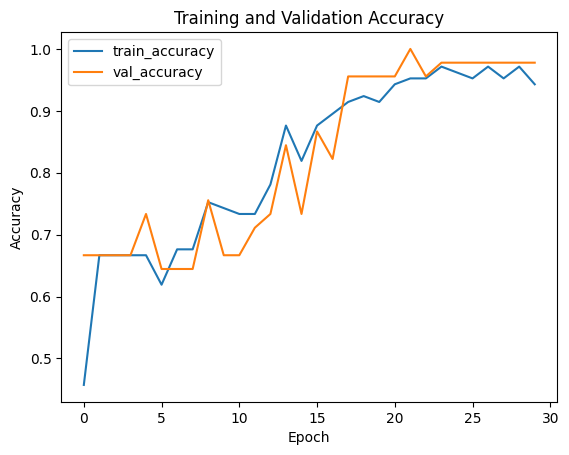

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

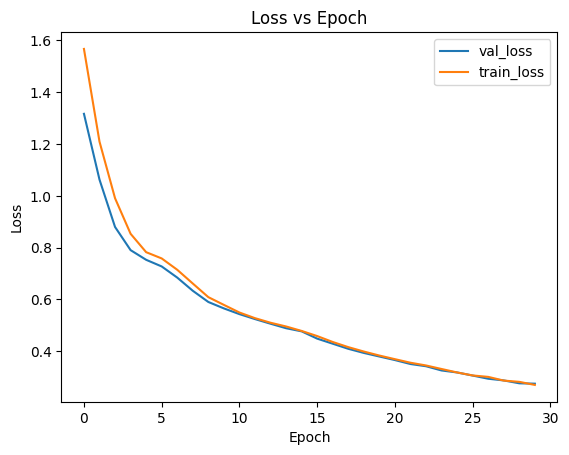

In [ ]:
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()